In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms

In [2]:
#Mount google drive,uncomment below if running in collab, change path accordingly
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Clone the github repo for starter code and downloading dataset.

In [ ]:
#!git clone https://github.com/neheller/kits19
#!cd kits19

In [22]:
import os
os.chdir('/content/drive/MyDrive/COMP9444/project/kits19') #path to projet folder, where kits19 files will be cloned.


In [23]:
!pwd

/content/drive/MyDrive/COMP9444/project/kits19


Below cell is to install required libraries and download dataset

In [ ]:
#!pip3 install -r requirements.txt #run this to install requirements as per kits19
#!python3 -m starter_code.get_imaging #download dataset into the gdrive

Check case details as numpy array.Volume is 3D scan details, segmentation is mask/label on the scan.

In [55]:
from starter_code.utils import load_case
from starter_code.visualize import visualize
from pathlib import Path

''' Below load_case will give two Nifty1Images.
Their shapes will be (num_slices, height, width) where num_slices is the number of 2D images of dimension height x width,
and their pixel datatypes will be np.float32 and np.uint8 respectively.
In the segmentation, a value of 0 represents background, 1 represents kidney, and 2 represents tumor.'''
volume, segmentation = load_case("case_00000")
# or
volume, segmentation = load_case(0)
print('Volume:\n\n',volume,'\n\nSegmentation:\n\n',segmentation)


#This saves all the layers of the case specified into directory specified
#visualize("case_00000", Path.cwd())

Volume:

 <class 'nibabel.nifti1.Nifti1Image'>
data shape (611, 512, 512)
affine: 
[[ 0.          0.         -0.91992188  0.        ]
 [ 0.         -0.91992188  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 611 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.        0.5       0.9199219 0.9199219 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0

Visualise specific slice.

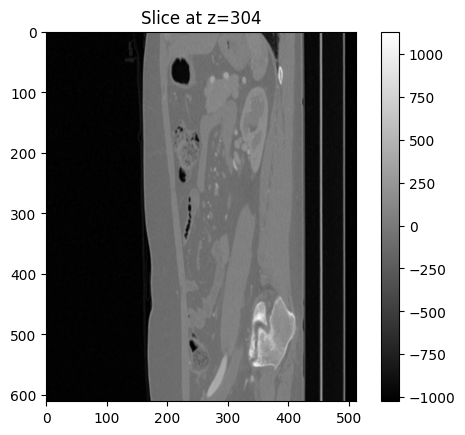

In [47]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

#load specific case number
case_number = 'case_00000' #ranges from case _00000 to case_00299

#get path of one of the images
my_image = '/content/drive/MyDrive/COMP9444/project/kits19/data/'+case_number+'/imaging.nii.gz'
#/content/drive/MyDrive/COMP9444/project/kits19/data/case_00000/imaging.nii.gz

# Load the NIfTI image
nifti_file = my_image # Replace with your NIfTI file path
nifti_image = nib.load(nifti_file)

# Get the image data as a NumPy array
image_data = nifti_image.get_fdata()

# Visualize the image using matplotlib
# Can create a simple 2D slice viewer
# 2D slice viewer:
plt.imshow(image_data[:, :, 304], cmap="gray")  # Display a slice at z=50
plt.title("Slice at z=304")
plt.colorbar()
plt.show()


Visualise specific slice of a case and it's mask/label.

Original shape:  (611, 512, 512)
Voxel dimension:  [0.5       0.9199219 0.9199219]


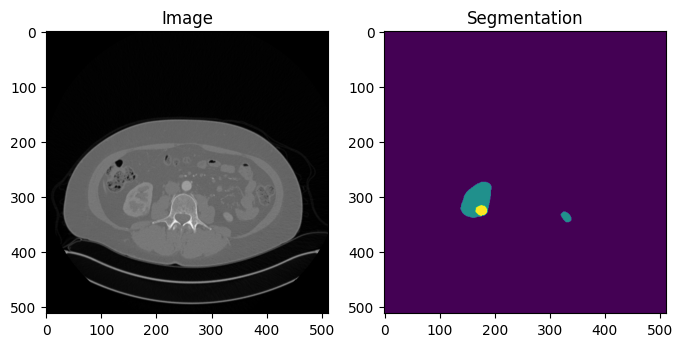

In [46]:
segment = '/content/drive/MyDrive/COMP9444/project/kits19/data/'+case_number+'/segmentation.nii.gz'

img = nib.load(my_image)
seg = nib.load(segment)

img_fig = img.get_fdata() # is a ndarray
seg_fig = seg.get_fdata()


chosen_slice = 304 # choosen slice number

fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_fig[chosen_slice,:,:], cmap = 'gray')
plt.title("Image")

a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(seg_fig[chosen_slice,:,:])
plt.title("Segmentation")

print("Original shape: ", img.shape)
print("Voxel dimension: ", img.header['pixdim'][1:4]) # is a ndarray

nilearn library is for visualising 3D images of brain scans.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



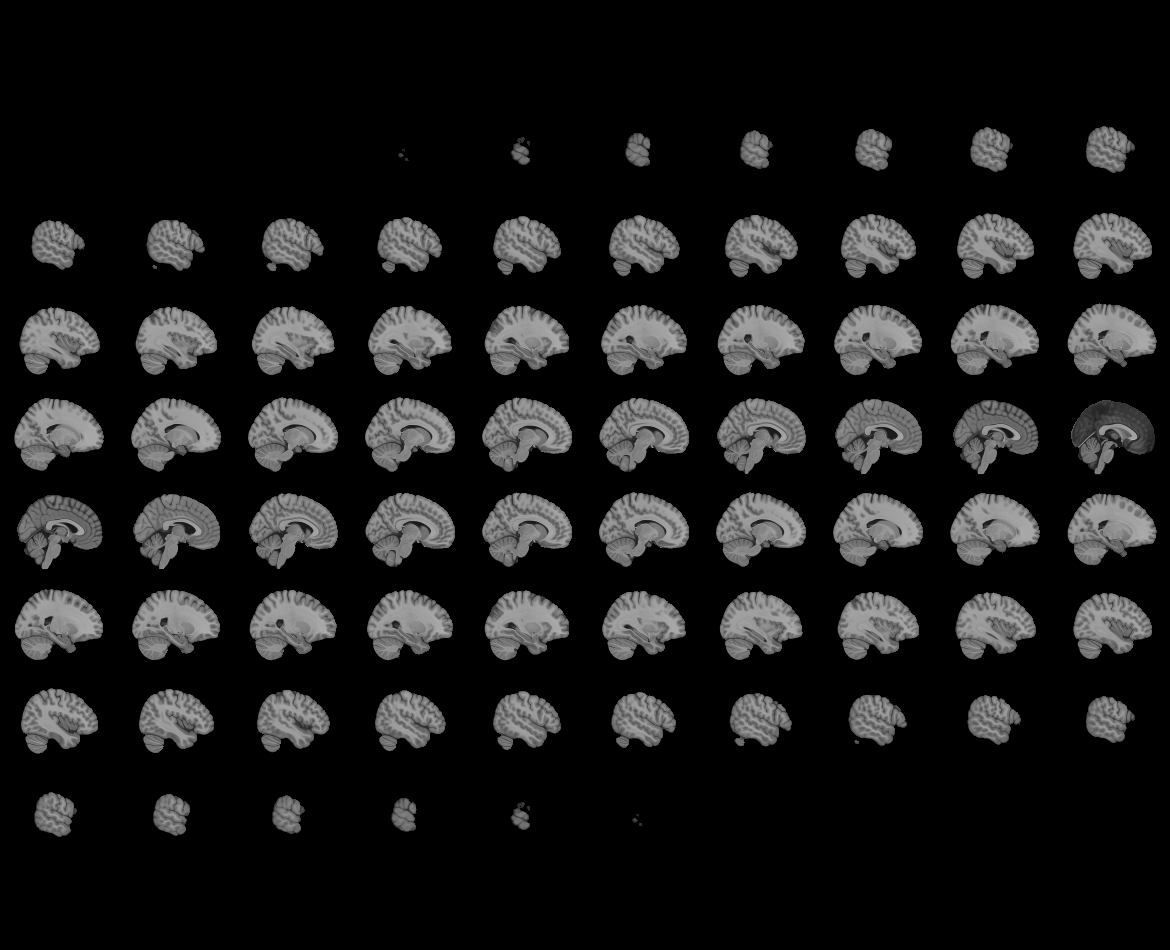
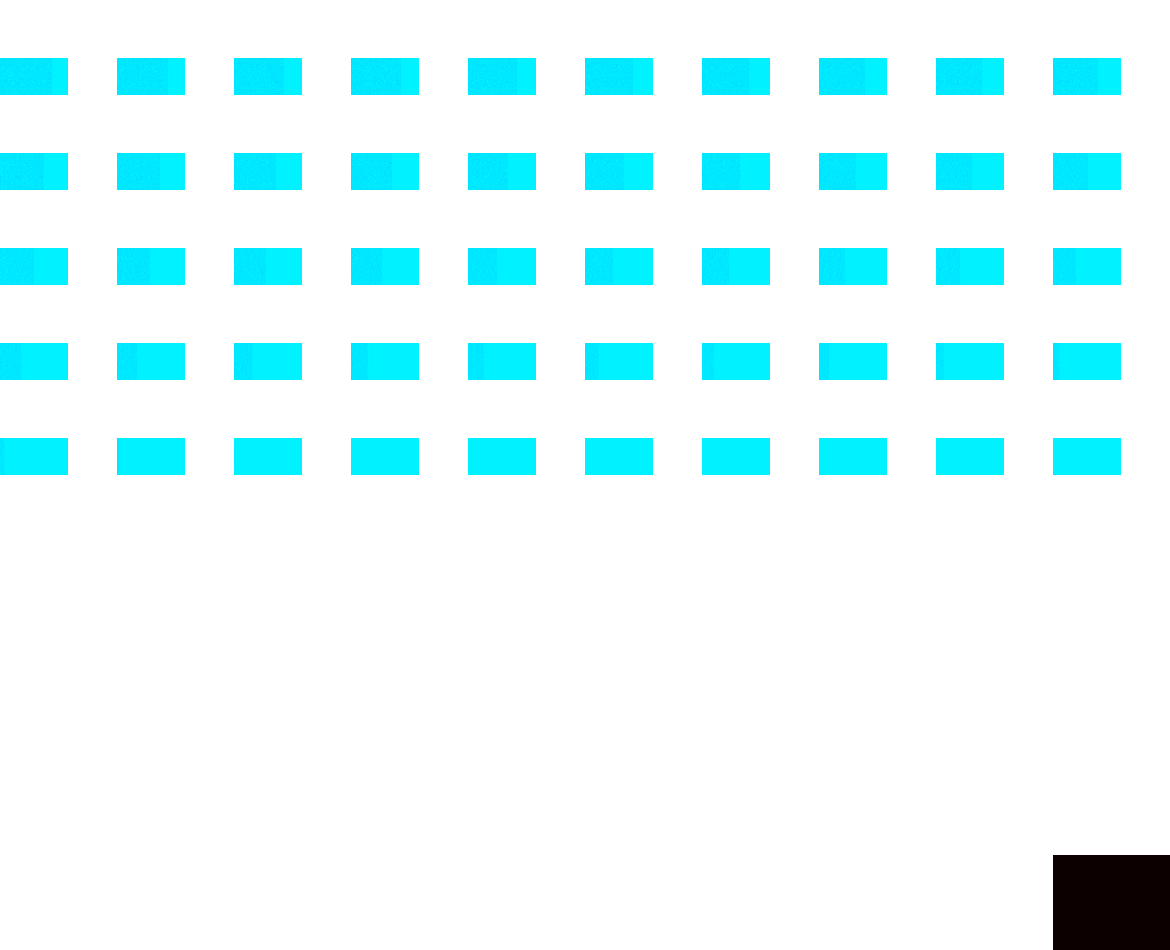

In [49]:
#Use nilearn to visualize 3d nifti1image
#!pip install nilearn
from nilearn import plotting
# Create a plot using nilearn
plotting.view_img(nifti_image, title="NIfTI Image")
